# Table of Contents
* [Tasks for those who "feel like a pro":](#Tasks-for-those-who-"feel-like-a-pro":)
* [Learning Resources](#Learning-Resources)
	* [Online](#Online)
	* [Reading (in the future)](#Reading-%28in-the-future%29)
* [Programming in python](#Programming-in-python)
	* [Writing code](#Writing-code)
	* [Some anti-patterns](#Some-anti-patterns)
* [Python basics](#Python-basics)
	* [Basic types](#Basic-types)
		* [variables](#variables)
		* [strings](#strings)
	* [data containers](#data-containers)
		* [lists](#lists)
		* [tuples](#tuples)
		* [sets](#sets)
		* [dictionaries](#dictionaries)
	* [Functions](#Functions)
		* [general patterns](#general-patterns)
		* [functions as arguments](#functions-as-arguments)
		* [lambda evaluation](#lambda-evaluation)
* [Numpy - scientific computing](#Numpy---scientific-computing)
	* [Building matrices and vectors](#Building-matrices-and-vectors)
	* [Basic manipulations](#Basic-manipulations)
		* [matvec](#matvec)
		* [broadcasting](#broadcasting)
		* [forcing dtype](#forcing-dtype)
		* [converting dtypes](#converting-dtypes)
		* [shapes (singletons)](#shapes-%28singletons%29)
		* [adding new dimension](#adding-new-dimension)
	* [Indexing, slicing](#Indexing,-slicing)
	* [View vs Copy](#View-vs-Copy)
	* [Reshaping](#Reshaping)
	* [Boolean indexing](#Boolean-indexing)
	* [Useful numpy functions](#Useful-numpy-functions)
		* [reducers: sum, mean, max, min, all, any](#reducers:-sum,-mean,-max,-min,-all,-any)
		* [numpy math functions](#numpy-math-functions)
		* [managing output](#managing-output)
		* [Meshes](#Meshes)
* [Scipy - scientific computing 2](#Scipy---scientific-computing-2)
	* [Building sparse matrix](#Building-sparse-matrix)
		* [How does scipy represent sparse matrix?](#How-does-scipy-represent-sparse-matrix?)
		* [Restoring full matrix](#Restoring-full-matrix)
	* [Popular  (not sparse) matrices:](#Popular--%28not-sparse%29-matrices:)
* [Timing - measuring performance](#Timing---measuring-performance)
	* [Simplest way to measure time](#Simplest-way-to-measure-time)
	* [Storing timings in a separate variable](#Storing-timings-in-a-separate-variable)
	* [`timeit` with -o parameter](#timeit-with--o-parameter)
* [Matplotlib - plotting in python](#Matplotlib---plotting-in-python)
	* [Configuring matplotlib](#Configuring-matplotlib)
	* [Global controls](#Global-controls)
	* [Combined plot](#Combined-plot)
		* [Combined plot "one-liner"](#Combined-plot-"one-liner")
	* [Plot formatting](#Plot-formatting)
	* [Subplots](#Subplots)
		* [Iterating over subplots](#Iterating-over-subplots)
		* [Manual control of subplots](#Manual-control-of-subplots)
* [Other topics](#Other-topics)
* [Solutions](#Solutions)


# Tasks for those who "feel like a pro":

**TASK 1**

Write the code to enumerate items in the list:
* items are not ordered
* items are not unique
* **don't use loops**
* **try to be as short as possible** (not considering import statements)

Example:

*Input*
```
items = ['foo', 'bar', 'baz', 'foo', 'baz', 'bar']

```

In [13]:
items = ['foo', 'bar', 'baz', 'foo', 'baz', 'bar']
np.unique(items,return_inverse = True)[1]

array([2, 0, 1, 2, 1, 0], dtype=int64)

*Output*
```
#something like:
[0, 1, 2, 0, 2, 1]

```

**TASK 2**

For each element in a list ```[0, 1, 2, ..., N]``` build all possible pairs with other elements of that list.

* exclude "self-pairing" (e.g. 0-0, 1-1, 2-2)
* **don't use loops**
* **try to be as short as possible**   (not considering import statements)

Example:

*Input:*
```
[0, 1, 2, 3] or just 4
```

In [22]:
from itertools import permutations

items = np.arange(4)
perms = tuple(permutations(items,2))
perms


((0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2))

*Output:*
```
0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3

1, 2, 3, 0, 2, 3, 0, 1, 3, 0, 1, 2
```

## Bonus Task 1 ZG: check if the number is prime

In [219]:
from math import ceil

def isPrimeNumber(x):
    if (isinstance(x,int) and x > 0):
        if x == 2:
            return True
        elif x <= 1 or x % 2 == 0:
            return False
        for i in range(3, int(x**(0.5))+1,2):
            print(i)
            if x % i == 0:
                return False
        return True
    else:
        print("Input has to be a positive integer")
        
def isPrimeRange(a, b):
    if (isinstance(a,int) and isinstance(a,int)  and a >= 0 and b >= 0):
        primes = []
        for x in range(a, b + 1):
            notPrime = False
            if x == 2:
                primes.append(x)
                continue
            elif x <= 1 or x % 2 == 0:
                continue
            for i in range(3, int(x ** (0.5)) + 1, 2):
                if x % i == 0:
                    notPrime = True
                    break
            if not notPrime:
                primes.append(x)
        return primes
    else:
        print("Both inputs have to be a non negative integer")
isPrimeNumber(5)

True

In [220]:
a = 0
b = 100
isPrimeRange(a,b)

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

## Bonus Task 2 ZG: compute efficient factorial

In [199]:
from math import factorial,gamma,ceil
import numpy as np
import operator as op
import functools as ft

def factorialNaive(x):
    if (isinstance(x,int) and x >= 0):
        n = 1   
        while x > 0:
            n = n*x
            x -= 1
        return n
    else:
        print("Input has to be a non-negative integer")

def factorialRecursive(x):
    if (isinstance(x,int) and x >= 0):
        if x == 0:
            return 1
        else:
            return x * factorialRecursive(x-1)
    else:
        print("Input has to be a non-negative integer")

In [61]:
N=10
%timeit factorialNaive(N)
%timeit factorialRecursive(N)
%timeit factorial(N)
%timeit gamma(N+1)

922 ns ± 6.73 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.56 µs ± 24.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
76.9 ns ± 0.553 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
144 ns ± 1.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
# ZG: Compared different algorithms, naive implementation uses looping and factorialRecursive(x) recursively calls the function untill all the computation are completed. However recursion is slower and has a bigger memory footprint at it has to create a new stack with every function call. Factorial and gamma are optimized implement

# Learning Resources

## Highly recommended

* "A Whirlwind Tour of Python" http://www.oreilly.com/programming/free/files/a-whirlwind-tour-of-python.pdf
* "Python Data Science Handbook" https://jakevdp.github.io/PythonDataScienceHandbook/

## Online

* The Hitchhiker’s Guide to Python
http://docs.python-guide.org/en/latest/

* Hard way is easier http://learnpythonthehardway.org

* Google python class
https://developers.google.com/edu/python/

* Python tutorial
https://docs.python.org/2/tutorial/

* Python Tutor - code visualizing (developed by MIT)
http://pythontutor.com/

* If you feel lost: CodeAcademy https://www.codecademy.com/en/tracks/python

**Learning by doing!**

## Reading (in the future)

* Al Sweigart, "Automate the Boring Stuff with Python", https://automatetheboringstuff.com
* Mark Lutz, "Python Pocket Reference" (250 pages)
* Mark Lutz, "Learning Python" (1600 pages!)

# Programming in python

## Writing code

* code should be readable first!

* style guides
    * PEP8 (PEP = Python Enhancement Proposal) http://legacy.python.org/dev/peps/pep-0008/
    * writing idiomatic code http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html

## Some anti-patterns

looping through dictionaries
http://docs.quantifiedcode.com/python-anti-patterns/performance/index.html

using wildcard imports (from ... import *)
http://docs.quantifiedcode.com/python-anti-patterns/maintainability/from_module_import_all_used.html


Using single letter to name your variables
http://docs.quantifiedcode.com/python-anti-patterns/maintainability/using_single_letter_as_variable_name.html


Comparing things to None the wrong way
http://docs.quantifiedcode.com/python-anti-patterns/readability/comparison_to_none.html


Comparing things to True the wrong way
http://docs.quantifiedcode.com/python-anti-patterns/readability/comparison_to_true.html


Using type() to compare types
http://docs.quantifiedcode.com/python-anti-patterns/readability/do_not_compare_types_use_isinstance.html


Using an unpythonic loop
http://docs.quantifiedcode.com/python-anti-patterns/readability/using_an_unpythonic_loop.html


Using CamelCase in function names
http://docs.quantifiedcode.com/python-anti-patterns/readability/using_camelcase_in_function_names.html

# Python basics

Verify your python version by running
```python
python --version
```

This notebook is written in Python 3.

## Basic types

### variables

```python
a = b = 3

c, d = 4, 5

c, d = d, c
```

### strings

In [1]:
greeting = 'Hello'
guest = "John"
my_string = 'Hello "John"'
named_greeting = 'Hello, {name}'.format(name=guest)

named_greeting2 = '{}, {}'.format(greeting, guest)

print(named_greeting)
print(named_greeting2)

Hello, John
Hello, John


## data containers

* list
* tuple
* set
* dictionary

for more details see docs:  https://docs.python.org/2/tutorial/datastructures.html

### lists

In [12]:
fruit_list = ['apple', 'orange', 'peach', 'mango', 'bananas', 'pineapple']

name_length = [len(fruit) for fruit in fruit_list]
print(name_length)

[5, 6, 5, 5, 7, 9]


In [13]:
name_with_p = [fruit for fruit in fruit_list if fruit[0] == 'p']  #even better: fruit.startswith('p')

In [14]:
numbered_fruits = []

In [15]:
for i, fruit in enumerate(fruit_list):
    numbered_fruits.append('{}.{}'.format(i, fruit))
    
numbered_fruits

['0.apple', '1.orange', '2.peach', '3.mango', '4.bananas', '5.pineapple']

Indexing starts with zero.

General indexing rule (mind the brackets): ```[start:stop:step]```

In [16]:
numbered_fruits[0] = None

In [17]:
numbered_fruits[1:4]

['1.orange', '2.peach', '3.mango']

In [18]:
numbered_fruits[1:-1:2]

['1.orange', '3.mango']

In [19]:
numbered_fruits[::-1]

['5.pineapple', '4.bananas', '3.mango', '2.peach', '1.orange', None]

### tuples

immutable type!

In [21]:
p_fruits = (name_with_p[1], name_with_p[0])
p_fruits[1] = 'mango'

TypeError: 'tuple' object does not support item assignment

ZG: I never realized that tuples are immutable. This is very practical for geodists for coordinates and other stuf. Ql thing to learn. It is also ql that they are faster to iterrate over (see bellow)

In [29]:
import timeit
print(timeit.timeit( 'x = (1,2,3,4,5,6)',number = 1500000))
print(timeit.timeit( 'x = [1,2,3,4,5,6]',number = 1500000))

0.0250411774864574
0.10184974044015149


In [30]:
single_number_tuple = 3,
single_number_tuple

(3,)

In [34]:
single_number_tuple + (2,) + (1, 0)

(3, 2, 1, 0)

### sets

Immutable type. Stores only unique elements.

In [35]:
set([0, 1, 2, 1, 1, 1, 3])

{0, 1, 2, 3}

### dictionaries

In [36]:
fruit_list = ['apple', 'orange', 'mango', 'banana', 'pineapple']
quantities = [3, 5, 2, 3, 4]

order_fruits = {fruit: num \
                for fruit, num in zip(fruit_list, quantities)}
order_fruits

{'apple': 3, 'orange': 5, 'mango': 2, 'banana': 3, 'pineapple': 4}

In [37]:
order_fruits['pineapple'] = 2
order_fruits

{'apple': 3, 'orange': 5, 'mango': 2, 'banana': 3, 'pineapple': 2}

In [40]:
print(order_fruits.keys())
print(order_fruits.values())
print(order_fruits.items())

dict_keys(['apple', 'orange', 'mango', 'banana', 'pineapple'])
dict_values([3, 5, 2, 3, 2])
dict_items([('apple', 3), ('orange', 5), ('mango', 2), ('banana', 3), ('pineapple', 2)])


In [39]:
for fruit, amount in order_fruits.items():
    print('Buy {num} {entity}s'.format(num=amount, entity=fruit))

Buy 3 apples
Buy 5 oranges
Buy 2 mangos
Buy 3 bananas
Buy 2 pineapples


## Functions

### general patterns

In [41]:
def my_func(var1, var2, default_var1=0, default_var2 = False):
    """
    This is a generic example of python a function.
    You can see this string when do call: my_func?
    """
    #do something with vars
    if not default_var2:
        result = var1
    elif default_var1 == 0:
        result = var1
    else:
        result = var1 + var2
    return result

function is just another object (like almost everything in python)

In [42]:
print('Function {} has the following docstring:\n{}'\
        .format(my_func.__name__, my_func.__doc__))

Function my_func has the following docstring:

    This is a generic example of python a function.
    You can see this string when do call: my_func?
    


Guidence on how to create meaningful docstring:
https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt#docstring-standard

### functions as arguments

In [43]:
def function_over_function(func, *args, **kwargs):
    function_result = func(*args, **kwargs)
    return function_result

In [44]:
function_over_function(my_func, 3, 5, default_var1=1, default_var2=True)

8

### lambda evaluation

In [45]:
function_over_function(lambda x, y, factor=10: (x+y)*factor, 1, 2, 5)

15

Don't assign lambda expressions to variables. If you need named instance - create standard function with `def`

In [46]:
my_simple_func = lambda x: x+1

vs

In [47]:
def my_simple_func(x):
    return x + 1

# Numpy - scientific computing

## Building matrices and vectors

In [48]:
import numpy as np

In [52]:
matrix_from_list = np.array([[1, 3, 4],
                             [2, 0, 5],
                             [4, 4, 1],
                             [0, 1, 0]])

vector_from_list = np.array([2, 1, 3])

print('The matrix is\n{matrix}\n\nthe vector is\n{vector}'\
        .format(vector=vector_from_list, matrix=matrix_from_list))

The matrix is
[[1 3 4]
 [2 0 5]
 [4 4 1]
 [0 1 0]]

the vector is
[2 1 3]


## Basic manipulations

### matvec

In [27]:
matrix_from_list.dot(vector_from_list)

array([17, 19, 15,  1])

### broadcasting

In [28]:
matrix_from_list + vector_from_list

array([[3, 4, 7],
       [4, 1, 8],
       [6, 5, 4],
       [2, 2, 3]])

### forcing dtype

In [29]:
single_precision_vector = np.array([1, 3, 5, 2], dtype=np.float32)
single_precision_vector.dtype

dtype('float32')

### converting dtypes

In [30]:
vector_from_list.dtype

dtype('int64')

In [31]:
vector_from_list.astype(np.int16)

array([2, 1, 3], dtype=int16)

### shapes (singletons)

mind dimensionality!

In [53]:
row_vector = np.array([[1,2,3]])

print('New vector {} has dimensionality {}'\
        .format(row_vector, row_vector.shape))

print('The dot-product is: ', matrix_from_list.dot(row_vector))

New vector [[1 2 3]] has dimensionality (1, 3)


ValueError: shapes (4,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [55]:
singleton_vector = row_vector.squeeze()
print('Squeezed vector {} has shape {}'.format(singleton_vector, singleton_vector.shape))

Squeezed vector [1 2 3] has shape (3,)


In [56]:
matrix_from_list.dot(singleton_vector)

array([19, 17, 15,  2])

### adding new dimension

In [64]:
print(singleton_vector[:, np.newaxis])

[[1]
 [2]
 [3]]


In [82]:
mat = np.arange(12)
mat.reshape(-1, 4)
mat

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

ZG: Like this only the original mat will be shown and i think it is important to see that the reshape does not change the original mat variable, which is not so clear here

In [79]:
print(singleton_vector[:, None])

[[1]
 [2]
 [3]]


## Indexing, slicing

In [85]:
vector12 = np.arange(12)
vector12

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Guess what is the output:
```python
vector12[:3]
vector12[-1]
vector12[:-2]
vector12[3:7]
vector12[::2]
vector12[::-1]
```

In [91]:
vector12[::-1]

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [93]:
matrix43 = vector12.reshape(4, 3)
matrix43

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

Guess what is the output:
```python
matrix43[:, 0]
matrix43[-1, :]
matrix43[::2, :]
matrix43[:3, :-1]
matrix43[3:, 1]
```

In [98]:
matrix43[3:, 1]

array([10])

Unlike Matlab, numpy arrays are column-major (or C-major) by default, not row-major (or F-major).

## View vs Copy

Working with views is more efficient and is a preferred way.

view is returned whenever basic slicing is used

more details at http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

making copy is simple:

In [99]:
matrix43_copy = matrix43[:]

## Reshaping

In [100]:
matrix_to_reshape = np.random.randint(10, 99, size=(6, 4))
matrix_to_reshape

array([[66, 68, 96, 26],
       [30, 41, 56, 80],
       [22, 60, 15, 95],
       [64, 38, 25, 13],
       [36, 82, 88, 65],
       [80, 19, 78, 16]])

In [101]:
reshaped_matrix = matrix_to_reshape.reshape(8, 3)
reshaped_matrix

array([[66, 68, 96],
       [26, 30, 41],
       [56, 80, 22],
       [60, 15, 95],
       [64, 38, 25],
       [13, 36, 82],
       [88, 65, 80],
       [19, 78, 16]])

reshape always returns view!

ZG: So this means that the reshaped matrix is not really saved in the memory but every time we call it it performes the corresponding operation on the matrix_to_reshape?

In [105]:
reshaped_matrix[-1, 0] = 1

In [106]:
np.set_printoptions(formatter={'all':lambda x: '_{}_'.format(x) if x < 10 else str(x)})

In [107]:
matrix_to_reshape[:]

array([[_1_, 68, 96, 26],
       [30, 41, 56, 80],
       [22, 60, 15, 95],
       [64, 38, 25, 13],
       [36, 82, 88, 65],
       [80, _1_, 78, 16]])

In [108]:
np.set_printoptions()

## Boolean indexing

In [109]:
idx = matrix43 > 4
matrix43[idx]

array([ 5,  6,  7,  8,  9, 10, 11])

## Useful numpy functions

eye, ones, zeros, diag

**Example:**
Build three-diagonal matrix with -2's on main diagonal and 1's and subdiagonals

Is this code valid?

In [142]:
def three_diagonal(N):
    A = np.zeros((N, N), dtype=np.int)
    for i in range(N):
        A[i, i] = -2
        if i > 0:
            A[i, i-1] = 1
        if i < N-1:
            A[i, i+1] = 1
    return A

print(three_diagonal(5))

[[-2  1  0  0  0]
 [ 1 -2  1  0  0]
 [ 0  1 -2  1  0]
 [ 0  0  1 -2  1]
 [ 0  0  0  1 -2]]


In [141]:
def numpy_three_diagonal(N):
    main_diagonal = -2 * np.eye(N)
    
    suddiag_value = np.ones(N-1,)
    lower_subdiag = np.diag(suddiag_value, k=-1)
    upper_subdiag = np.diag(suddiag_value, k=1)
    
    result = main_diagonal + lower_subdiag + upper_subdiag
    return result.astype(np.int)

numpy_three_diagonal(5)

array([[-2,  1,  0,  0,  0],
       [ 1, -2,  1,  0,  0],
       [ 0,  1, -2,  1,  0],
       [ 0,  0,  1, -2,  1],
       [ 0,  0,  0,  1, -2]])

### reducers: sum, mean, max, min, all, any

In [140]:
A = numpy_three_diagonal(5)
A[0, -1] = 5
A[-1, 0] = 3

print(A)
print(A.sum())
print(A.min())
print(A.max(axis=0))
print(A.sum(axis=0))
print(A.mean(axis=1))
print((A > 4).any(axis=1))

[[-2  1  0  0  5]
 [ 1 -2  1  0  0]
 [ 0  1 -2  1  0]
 [ 0  0  1 -2  1]
 [ 3  0  0  1 -2]]
6
-2
[3 1 1 1 5]
[2 0 0 0 4]
[0.8 0.  0.  0.  0.4]
[ True False False False False]


### numpy math functions

In [113]:
print(np.pi)

3.141592653589793


In [114]:
args = np.arange(0, 2.5*np.pi, 0.5*np.pi)

In [115]:
print(np.sin(args))

[ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00
 -2.4492936e-16]


In [119]:
print(np.round(np.sin(args), decimals=2))

[ 0.  1.  0. -1. -0.]


### managing output

In [121]:
'{}, {:.1%}, {:e}, {:.2f}, {:.0f}'.format(*np.sin(args))

'0.0, 100.0%, 1.224647e-16, -1.00, -0'

In [56]:
np.set_printoptions(formatter={'all':lambda x: '{:.2f}'.format(x)})
print(np.sin(args))
np.set_printoptions()

[0.00 1.00 0.00 -1.00 -0.00]


### Meshes

linspace, meshgrid

Let's produce a function
$$
f(x, y) = \sin(x+y)
$$
on some mesh.

In [124]:
linear_index = np.linspace(0, np.pi, 10, endpoint=True)
mesh_x, mesh_y = np.meshgrid(linear_index, linear_index)

values_3D = np.sin(mesh_x + mesh_y)

Text(0.5,0.92,'The plot of $f(x, y) = sin(x+y)$')

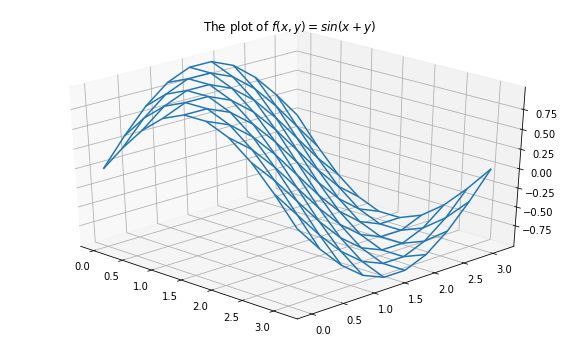

In [123]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot_wireframe(mesh_x, mesh_y, values_3D)
ax.view_init(azim=-45, elev=30)

plt.title('The plot of $f(x, y) = sin(x+y)$')

# Scipy - scientific computing 2

## Building sparse matrix

In [126]:
import scipy.sparse as sp

In [139]:
def scipy_three_diagonal(N):
    main_diagonal = -2 * np.ones(N, )
    suddiag_values = np.ones(N-1,)
    
    diagonals = [main_diagonal, suddiag_values, suddiag_values]
    # Another option: use sp.eye(N) and add subdiagonals
    offsets = [0, 1, -1]
    
    result = sp.diags(diagonals, offsets, shape=(N, N), format='coo')
    return result

my_sparse_matrix = scipy_three_diagonal(5)

### How does scipy represent sparse matrix?

In [128]:
my_sparse_matrix

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in COOrdinate format>

Sparse matrix stores only non-zero elements (and their indices)

In [129]:
print(my_sparse_matrix)

  (0, 0)	-2.0
  (1, 1)	-2.0
  (2, 2)	-2.0
  (3, 3)	-2.0
  (4, 4)	-2.0
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 3)	1.0
  (3, 4)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 3)	1.0


### Restoring full matrix

In [130]:
my_sparse_matrix.toarray()

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

In [131]:
my_sparse_matrix.A

array([[-2.,  1.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  1., -2.]])

## Popular  (not sparse) matrices:

In [134]:
from scipy.linalg import toeplitz, hankel

In [135]:
hankel(range(4), [-1, -2, -3, -4])

array([[ 0,  1,  2,  3],
       [ 1,  2,  3, -2],
       [ 2,  3, -2, -3],
       [ 3, -2, -3, -4]])

In [136]:
toeplitz(range(4))

array([[0, 1, 2, 3],
       [1, 0, 1, 2],
       [2, 1, 0, 1],
       [3, 2, 1, 0]])

# Timing - measuring performance

## Simplest way to measure time

In [143]:
N = 100
%timeit three_diagonal(N)
%timeit numpy_three_diagonal(N)
%timeit scipy_three_diagonal(N)

51.8 µs ± 671 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
57.6 µs ± 616 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
174 µs ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


You can also use `%%timeit` magic to measure run time of the whole cell

ZG: Interesting results that the scipy takes almoast 3 times longer than looping. So it means that we have to sacrifice time in order to reduce the memory footprint

In [144]:
%%timeit
N = 100
calc = three_diagonal(N)
calc = scipy_three_diagonal(N)
del calc

257 µs ± 9.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Storing timings in a separate variable

Avoid using `time.time()` or `time.clock()` directly as their behaviour's different depending on platform; `default_timer` makes the best choice for you. It measures wall time though, e.g. not very precise.

In [145]:
from timeit import default_timer as timer

In [146]:
dims = [300, 1000, 2000, 3000]
bench_names = ['loop', 'numpy', 'scipy']
timings = {bench:[] for bench in bench_names}

for n in dims:
    start_time = timer()
    calc = three_diagonal(n)
    time_delta = timer() - start_time
    timings['loop'].append(time_delta)
    
    start_time = timer()
    calc = numpy_three_diagonal(n)
    time_delta = timer() - start_time
    timings['numpy'].append(time_delta)
    
    start_time = timer()
    calc = scipy_three_diagonal(n)
    time_delta = timer() - start_time
    timings['scipy'].append(time_delta)

Let's make the code less redundant

In [ ]:
dims = [300, 1000, 2000, 3000]
bench_names = ['loop', 'numpy', 'scipy']
timings = {bench_name: [] for bench_name in bench_names}

def timing_machine(func, *args, **kwargs):
    start_time = timer()
    result = func(*args, **kwargs)
    time_delta = timer() - start_time
    return time_delta

for n in dims:
    timings['loop'].append(timing_machine(three_diagonal, n))
    timings['numpy'].append(timing_machine(numpy_three_diagonal, n))
    timings['scipy'].append(timing_machine(scipy_three_diagonal, n))

## `timeit` with -o parameter

more details on different parameters:
https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-timeit

In [147]:
timeit_result = %timeit -q -r 5 -o three_diagonal(10)
print('Best of {} runs: {:.8f}s'.format(timeit_result.repeat,
                                        timeit_result.best))

Best of 5 runs: 0.00000581s


Our new benchmark procedure

In [150]:
dims = [100, 300, 1000, 2000]
bench_names = ['loop', 'numpy', 'scipy']
bench_funcs = [three_diagonal, numpy_three_diagonal, scipy_three_diagonal]
timings_best = {bench_name: [] for bench_name in bench_names}

for bench_name, bench_func in zip(bench_names, bench_funcs):
    print('\nMeasuring {}'.format(bench_func.__name__))
    for n in dims:
        print(n)
        time_result = %timeit -q -o bench_func(n)
        timings_best[bench_name].append(time_result.best)


Measuring three_diagonal
100
300
1000
2000

Measuring numpy_three_diagonal
100
300
1000
2000

Measuring scipy_three_diagonal
100
300
1000
2000


In [151]:
timings_best

{'loop': [5.4053779069181474e-05,
  0.00017727087534567546,
  0.0020129465319587325,
  0.003811823684045521],
 'numpy': [5.825493136926525e-05,
  0.001413755757150284,
  0.023512110487354222,
  0.081441147320038],
 'scipy': [0.00017843116342373833,
  0.000184327520662373,
  0.00021523453205918487,
  0.00025573595357855086]}

ZG: I have changed the code slightly to compare with the results from above. Personally I have expected that scipy will outperform other methods when the dimensions increase however it is quite interesting/schocking that numpy becomes much slower than looping but probably the reason is that we have to allocate/create intermediate arrays in the process

# Matplotlib - plotting in python

don't forget to check
* http://matplotlib.org/users/pyplot_tutorial.html
* http://matplotlib.org/gallery.html
* http://matplotlib.org/examples/index.html

## Configuring matplotlib

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline 

`%matplotlib inline` ensures all graphs are plotted inside your notebook

## Global controls

(more at http://matplotlib.org/users/customizing.html)

In [153]:
# plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'font.size': 14})

## Combined plot

Text(0,0.5,'Time, s')

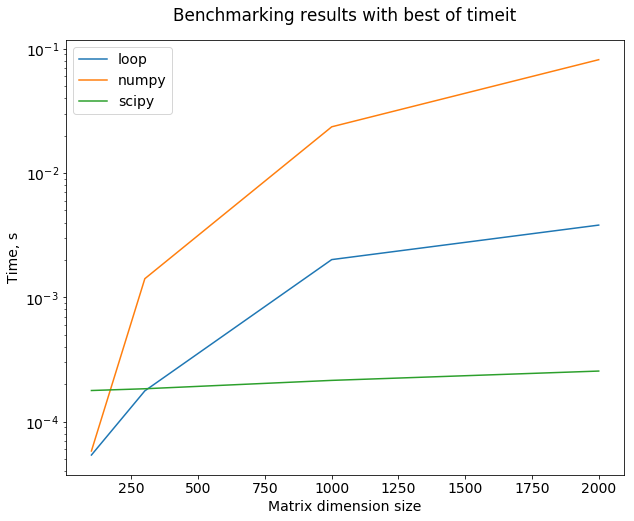

In [154]:
plt.figure(figsize=(10,8))

for bench_name, values in timings_best.items():
    plt.semilogy(dims, values, label=bench_name)
    
plt.legend(loc='best')
plt.title('Benchmarking results with best of timeit', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

Text(0,0.5,'Time, s')

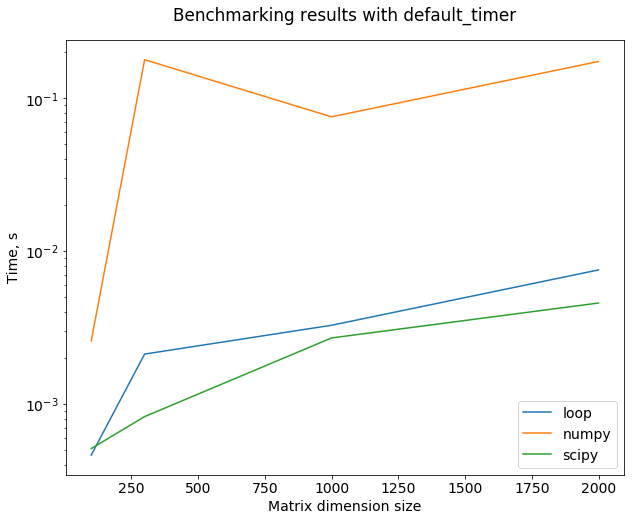

In [155]:
plt.figure(figsize=(10,8))

for bench_name, values in timings.items():
    plt.semilogy(dims, values, label=bench_name)
    
plt.legend(loc='best')
plt.title('Benchmarking results with default_timer', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

**Think, why:**
* "loop" was faster then "numpy"
* "scipy" is almost constant
* results for *default_timer* and *"best of timeit"* are different

You might want to read the docs:
* https://docs.python.org/2/library/timeit.html#timeit.default_timer
* https://docs.python.org/2/library/time.html#time.clock and https://docs.python.org/2/library/time.html#time.time

**Remark:** starting from *python 3.3* it's recommended to use ```time.perf_counter()``` and ```time.process_time()```
https://docs.python.org/3/library/time.html#time.perf_counter

Also note, that for advanced benchmarking it's better to use profiling tools.

ZG: I have changed the code slightly to compare with the results from above. Personally I have expected that scipy will outperform other methods when the dimensions increase however it is quite interesting/schocking that numpy becomes much slower than looping but probably the reason is that we have to allocate/create intermediate arrays in the process. Scipy is almost constant probably because the number of values that have to be saved grows only near to linearly and not quadratic

### Combined plot "one-liner"

Use ```plt.plot?``` to get detailed info on function usage.

**Task**: given lists of x-values, y-falues and plot format strings, plot all three graphs in one line.

*Hint*: use list comprehensions

In [ ]:
k = len(timings_best)
iter_xyf = [item for sublist in zip([dims]*k,
                                    timings_best.values(),
                                    list('rgb'))\
                                for item in sublist]

plt.figure(figsize=(10, 8))
plt.semilogy(*iter_xyf)

plt.legend(timings_best.keys(), loc=2, frameon=False)
plt.title('Benchmarking results - "one-liner"', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('Time, s')

Even simpler way - also gives you granular control on plot objects

In [ ]:
plt.figure(figsize=(10, 8))

figs = [plt.semilogy(dims, values, label=bench_name)\
        for bench_name, values in timings.items()];

ax0, = figs[0]
ax0.set_dashes([5, 10, 20, 10, 5, 10])

ax1, = figs[1]
ax1.set_marker('s')
ax1.set_markerfacecolor('r')

ax2, = figs[2]
ax2.set_linewidth(6)
ax2.set_alpha(0.3)
ax2.set_color('m')

## Plot formatting

matplotlib has a number of different options for styling your plot

In [ ]:
all_markers = [
'.', # point
',', # pixel
'o', # circle
'v', # triangle down
'^', # triangle up
'<', # triangle_left
'>', # triangle_right
'1', # tri_down
'2', # tri_up
'3', # tri_left
'4', # tri_right
'8', # octagon
's', # square
'p', # pentagon
'*', # star
'h', # hexagon1
'H', # hexagon2
'+', # plus
'x', # x
'D', # diamond
'd', # thin_diamond
'|', # vline
]

all_linestyles = [
'-',  # solid line style
'--', # dashed line style
'-.', # dash-dot line style
':',  # dotted line style
'None'# no line
]

all_colors = [
'b', # blue
'g', # green
'r', # red
'c', # cyan
'm', # magenta
'y', # yellow
'k', # black
'w', # white
]

## Subplots

for advanced usage of subplots start here
* http://matplotlib.org/examples/pylab_examples/subplots_demo.html
* http://matplotlib.org/users/tight_layout_guide.html
* http://matplotlib.org/users/gridspec.html

### Iterating over subplots

In [ ]:
n = len(timings)
experiment_names = list(timings.keys())

fig, axes = plt.subplots(1, n, sharey=True, figsize=(16,4))

colors = np.random.choice(list('rgbcmyk'), n, replace=False)
markers = np.random.choice(all_markers, n, replace=False)
lines = np.random.choice(all_linestyles, n, replace=False)

for ax_num, ax in enumerate(axes):
    key = experiment_names[ax_num]
    ax.semilogy(dims, timings[key], label=key,
            color=colors[ax_num],
            marker=markers[ax_num],
            markersize=8,
            linestyle=lines[ax_num],
            lw=3)
    ax.set_xlabel('matrix dimension')
    ax.set_title(key)

axes[0].set_ylabel('Time, s')
plt.suptitle('Benchmarking results', fontsize=16,  y=1.03)


### Manual control of subplots

In [ ]:
plt.figure()
plt.subplot(211)
plt.plot([1,2,3])

plt.subplot(212)
plt.plot([2,5,4])

**Task**: create subplot with 2 columns and 2 rows. Leave bottom left quarter empty. Scipy and numpy benchmarks should go into top row.

# Other topics

function wrappers and decorators

installing packages

importing modules

ipyton magic

qtconsole

environment

extensions

profiles (deprecated in jupyter)

profiling

debugging

cython, numba

openmp

OOP

python 2 vs python 3

plotting in python - palletes and colormaps, styles

pandas (presenting results)

numpy strides, contiguousness, vectorize function, broadcasting, saving output

magic functions (applied to line and to code cell)

jupyter configuration

# Solutions

**Task 1**

In [2]:
items = ['foo', 'bar', 'baz', 'foo', 'baz', 'bar']

method 1

In [3]:
from collections import defaultdict

item_ids = defaultdict(lambda: len(item_ids))
list(map(item_ids.__getitem__, items))

[0, 1, 2, 0, 2, 1]

method 2

In [4]:
import pandas as pd

pd.DataFrame({'items': items}).groupby('items', sort=False).grouper.group_info[0]

array([0, 1, 2, 0, 2, 1], dtype=int64)

method 3

In [5]:
import numpy as np

np.unique(items, return_inverse=True)[1]

array([2, 0, 1, 2, 1, 0], dtype=int64)

method 4

In [ ]:
last = 0
counts = {}
result = []
for item in items:
    try:
        count = counts[item]
    except KeyError:
        counts[item] = count = last
        last += 1
    result.append(count)

result

**Task 2**

In [6]:
N = 1000

In [7]:
from itertools import permutations

%timeit list(permutations(range(N), 2))

105 ms ± 3.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Hankel matrix: $a_{ij} = a_{i-1, j+1}$

In [8]:
import numpy as np
from scipy.linalg import hankel

def pairs_idx(n):
    return np.vstack((np.repeat(range(n), n-1), hankel(range(1, n), range(-1, n-1)).ravel()))

In [9]:
%timeit pairs_idx(N)

10.7 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
